In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv("water_potability.csv")

In [3]:
#load matrix data to csv file
"""
import scipy.io

mat = scipy.io.loadmat("B:\data\water_dataset.mat")

mat = {k: v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})
data.to_csv("example.csv")
"""


'\nimport scipy.io\n\nmat = scipy.io.loadmat("B:\\data\\water_dataset.mat")\n\nmat = {k: v for k, v in mat.items() if k[0] != \'_\'}\ndata = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.items()})\ndata.to_csv("example.csv")\n'

In [4]:
file.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
file.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.960000           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
file.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966785     0.390110  
std       80.824064        3.308162        16.175008     0.780384     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
file.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [8]:
file.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

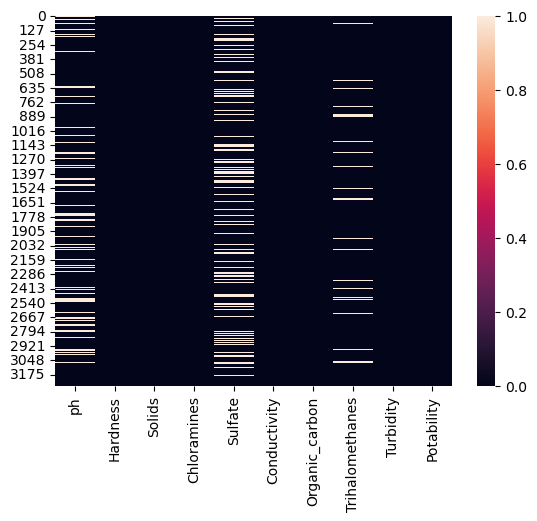

In [9]:
sns.heatmap(file.isnull())
plt.savefig("null_heatmap.png")

In [10]:
ph_mean = file['ph'].mean()
chloramines_mean = file['Chloramines'].mean()
trihalomethanes_mean = file['Trihalomethanes'].mean()
sulfate_mean =file['Sulfate'].mean()

In [11]:
file['ph'].fillna(value=ph_mean, inplace=True)
file['Chloramines'].fillna(value=chloramines_mean, inplace=True)
file['Trihalomethanes'].fillna(value=trihalomethanes_mean, inplace=True)
file['Sulfate'].fillna(value=sulfate_mean, inplace=True)

In [12]:
file.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

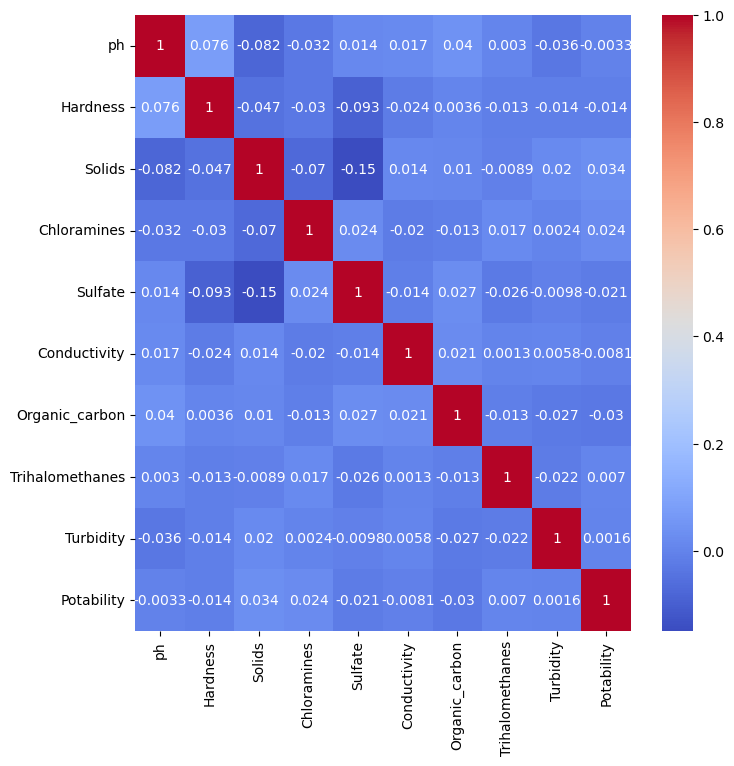

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(file.corr(), annot=True, cmap='coolwarm')

plt.savefig("heatmap.png")

In [14]:
# save the plot as PNG file
#plt.savefig("seaborn_plot.png")

In [15]:
#ubstacking the correlation matrix
corr = file.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending=False)[12:24]

Hardness        Sulfate           0.092766
Sulfate         Hardness          0.092766
ph              Solids            0.081884
Solids          ph                0.081884
Hardness        ph                0.075833
ph              Hardness          0.075833
Solids          Chloramines       0.070148
Chloramines     Solids            0.070148
Hardness        Solids            0.046899
Solids          Hardness          0.046899
ph              Organic_carbon    0.040061
Organic_carbon  ph                0.040061
dtype: float64

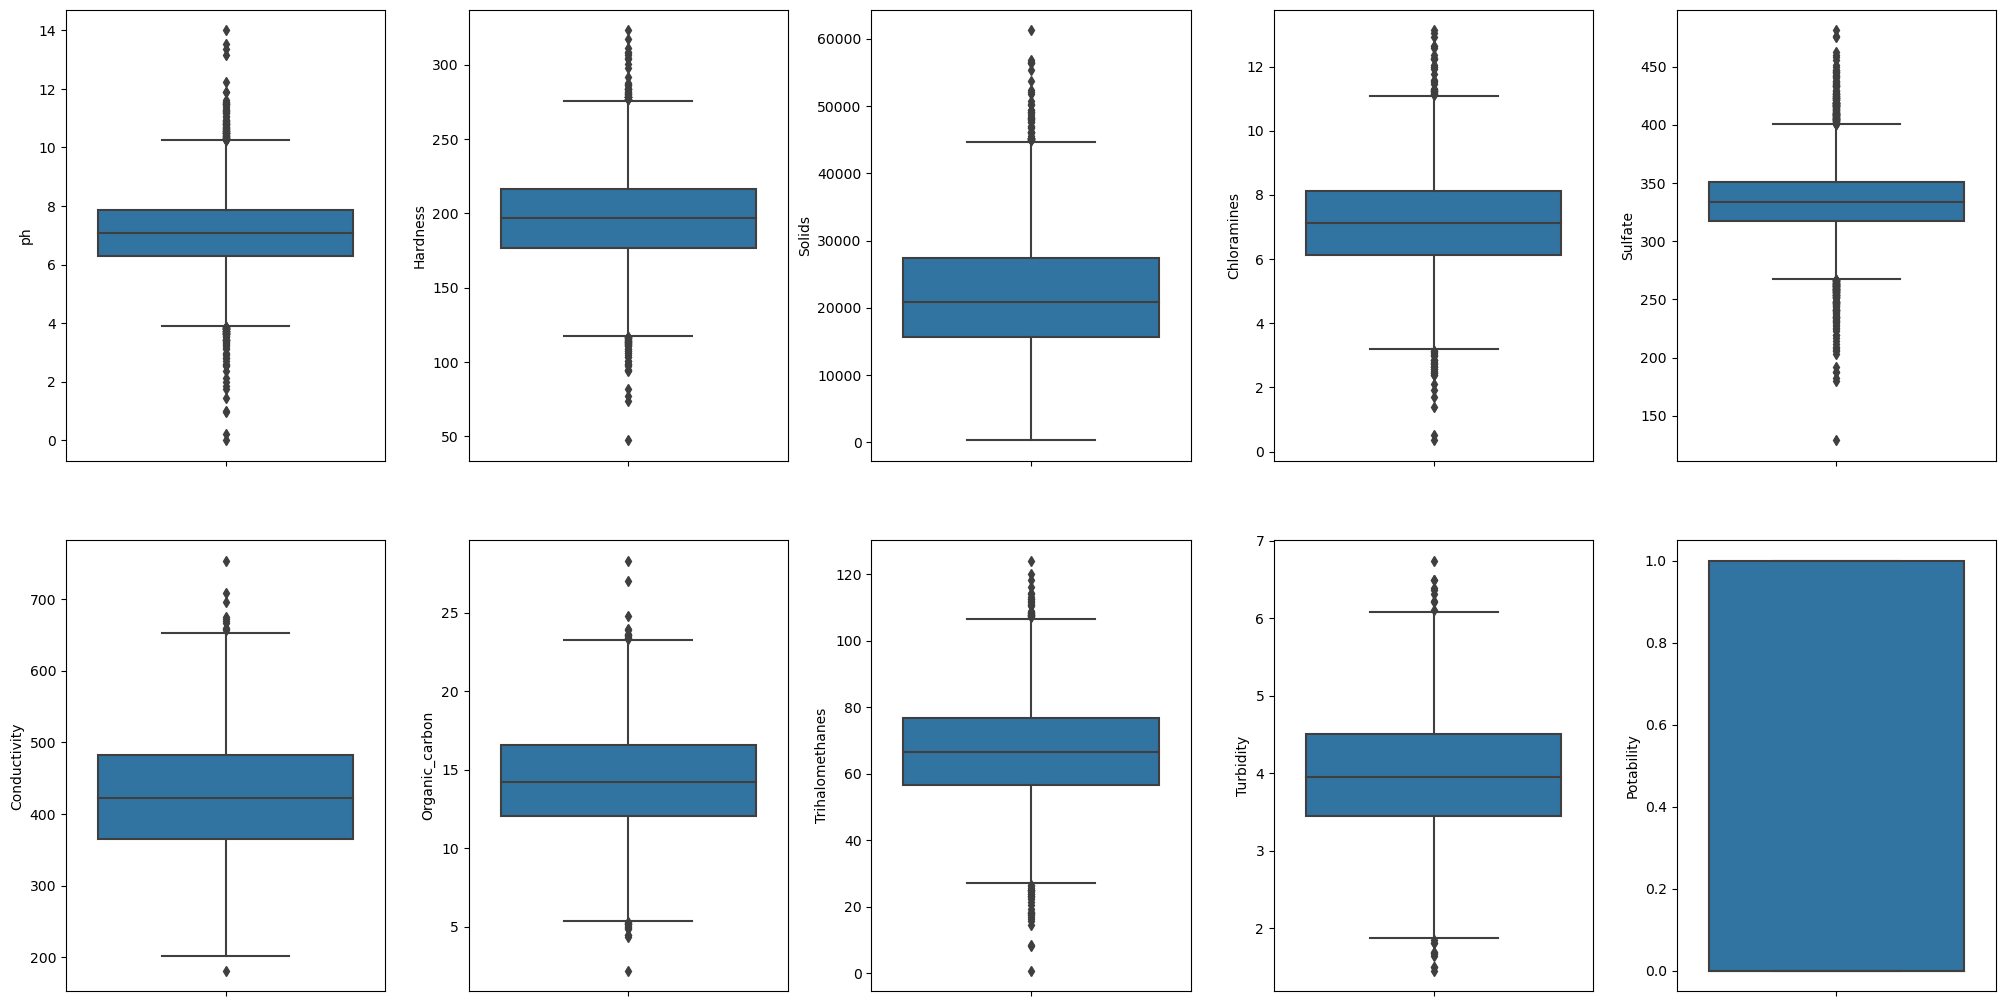

In [16]:
# visualizing dataset and checking for the outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in file.items():
    sns.boxplot(y=col, data=file, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

plt.savefig("outliers_boxplot.png")

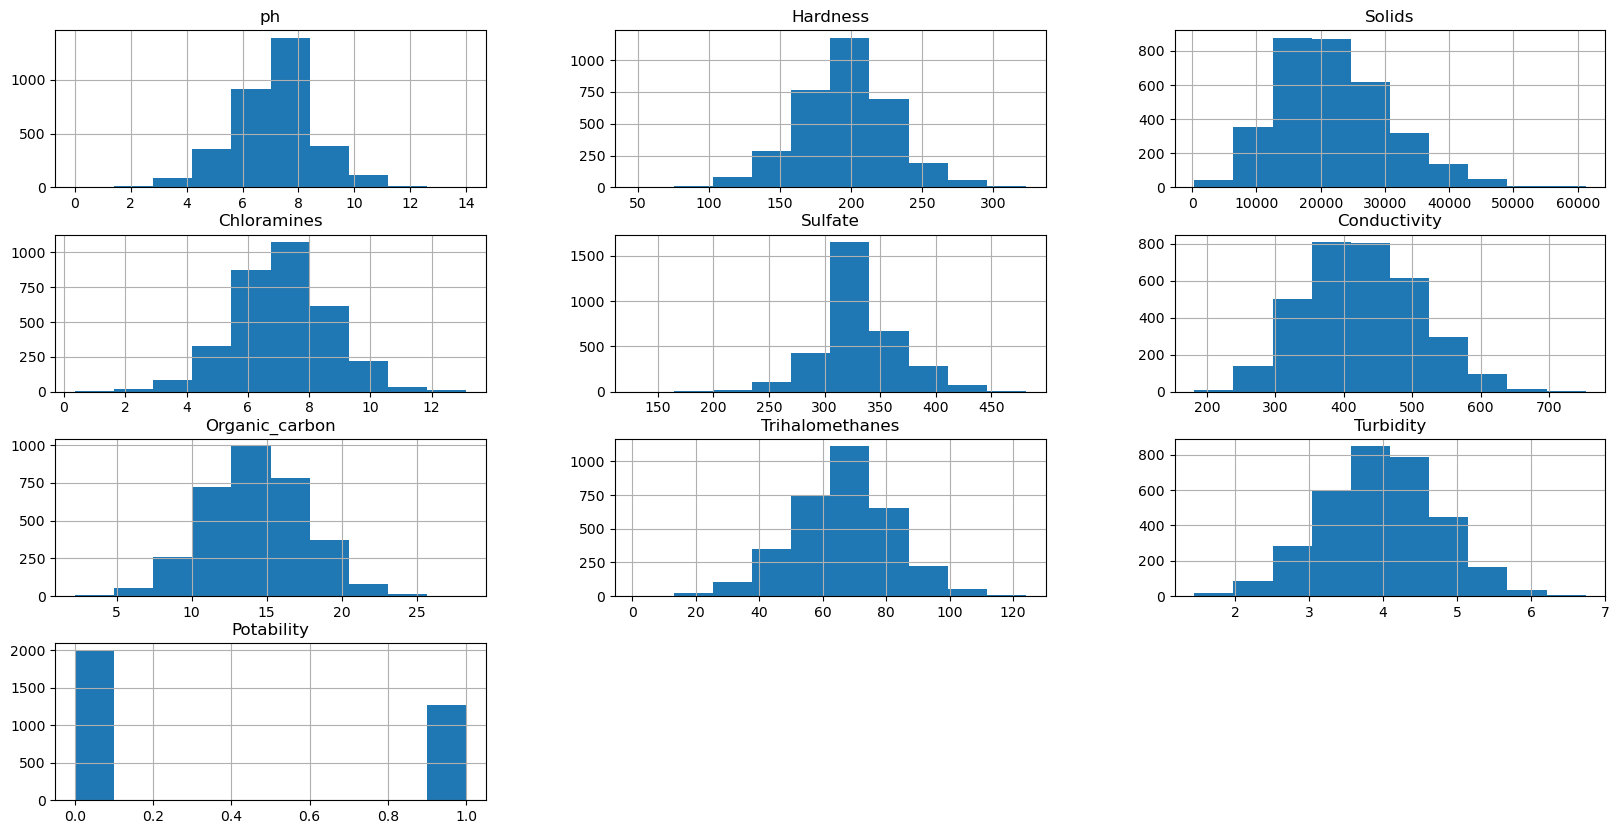

<Figure size 2000x1000 with 0 Axes>

In [17]:
plt.rcParams['figure.figsize'] = (20,10)
file.hist()
plt.show()

plt.savefig("histogram.png")

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


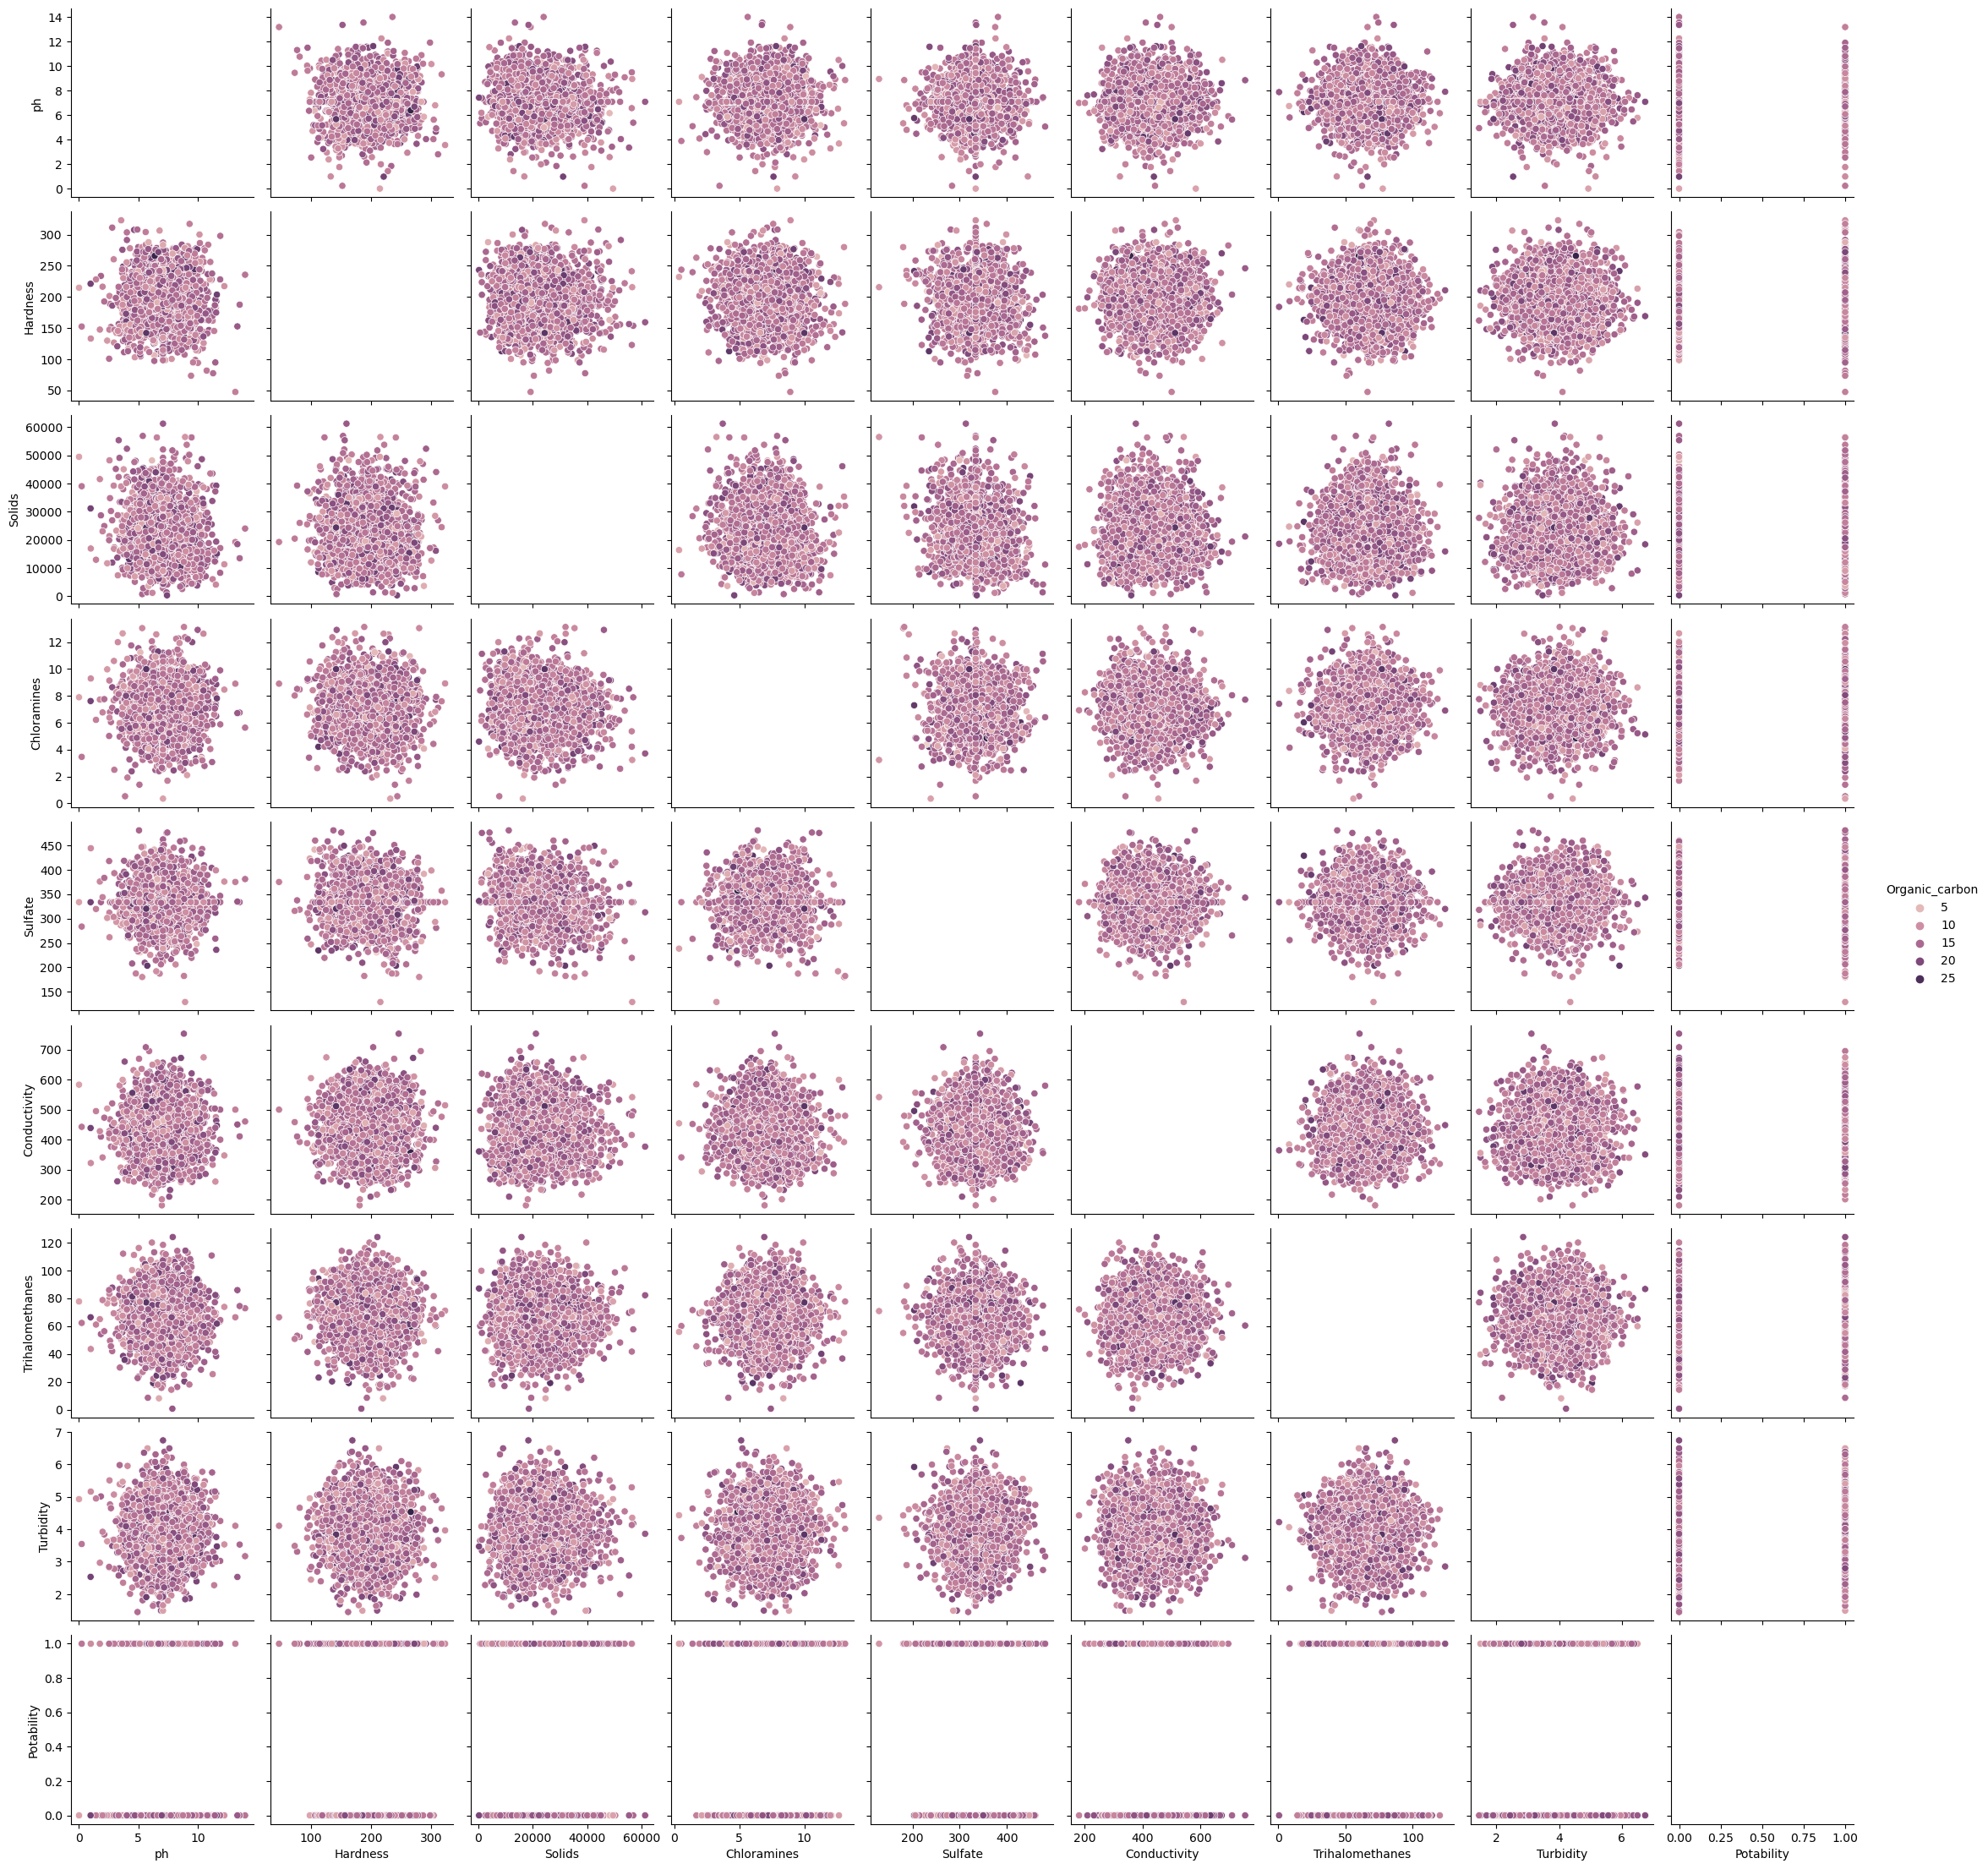

In [18]:
sns.pairplot(file, hue="Organic_carbon")

plt.savefig("pairplot.png")

In [19]:
#Scatter plot

fig = px.scatter(file, x='ph', y='Organic_carbon', color='Hardness', template='plotly_dark', trendline='ols')
fig.show()

plt.savefig("scatterplot.png")

<Figure size 2000x1000 with 0 Axes>

Prediction models

In [20]:
# Specifying independent and target variables
x = file.drop(['Potability'], axis=1)
y = file['Potability']

In [21]:

from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [22]:
def plots(df, var):
    #instantiate the scaler
    robust = RobustScaler()
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,2,1)
    sns.kdeplot(df[var])
    plt.title('before'+str(robust).split('(')[0])
    
    plt.subplot(1,2,2)
    #fit the column and plot
    sp2 = robust.fit_transform(df[[var]]).flatten()
    sns.kdeplot(sp2)
    plt.title('after'+str(robust).split('(')[0])

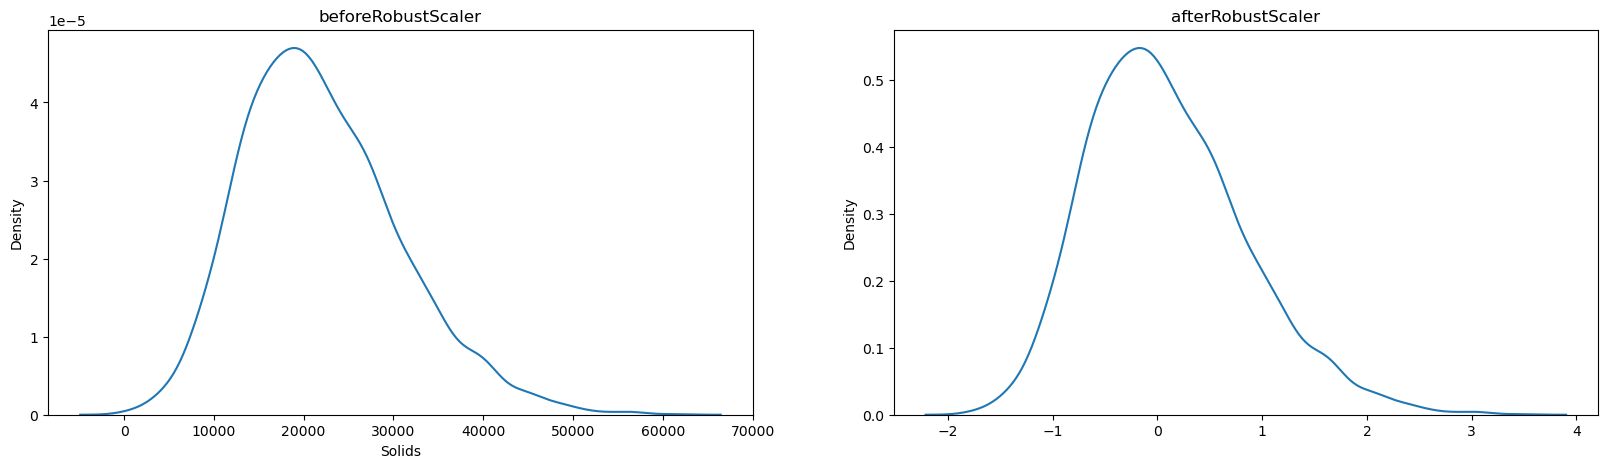

In [23]:
plots(file, var="Solids")

plt.savefig("before_after_robustscalar.png")

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

creating a model pipeline

In [25]:
models = {
    'Logisitic Regression': LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    'K Neighbors' : KNeighborsClassifier(),
    'SVM' : SVR(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Naive Bayes' : GaussianNB()
}

In [26]:
#function to fit and score machine learning algorithm models after scaling to fix the outliers

def scaled_fit_score(models, x_train, x_test, y_train, y_test):
    np.random.seed()
    scaled_model_scores = {}
    
    
    #iterate through the models deictionary items
    for name, model in models.items():
        scaled_model = Pipeline([('model', model)])
        #fit model the training set into each of the model in the dictionary
        scaled_model.fit(x_train, y_train)
        #get the model score and attach it to each model name from model dictionary
        scaled_model_scores[name] = scaled_model.score(x_test, y_test)
    return scaled_model_scores    

In [27]:
# call function to display the evaluation score of the models
scaled_scores = scaled_fit_score(models=models,
                                x_train = x_train,
                                y_train = y_train,
                                x_test = x_test, 
                                y_test = y_test)
scaled_scores

{'Logisitic Regression': 0.6280487804878049,
 'Random Forest': 0.6814024390243902,
 'K Neighbors': 0.5411585365853658,
 'SVM': -0.3138621103341912,
 'Decision Tree Classifier': 0.5823170731707317,
 'Naive Bayes': 0.6310975609756098}

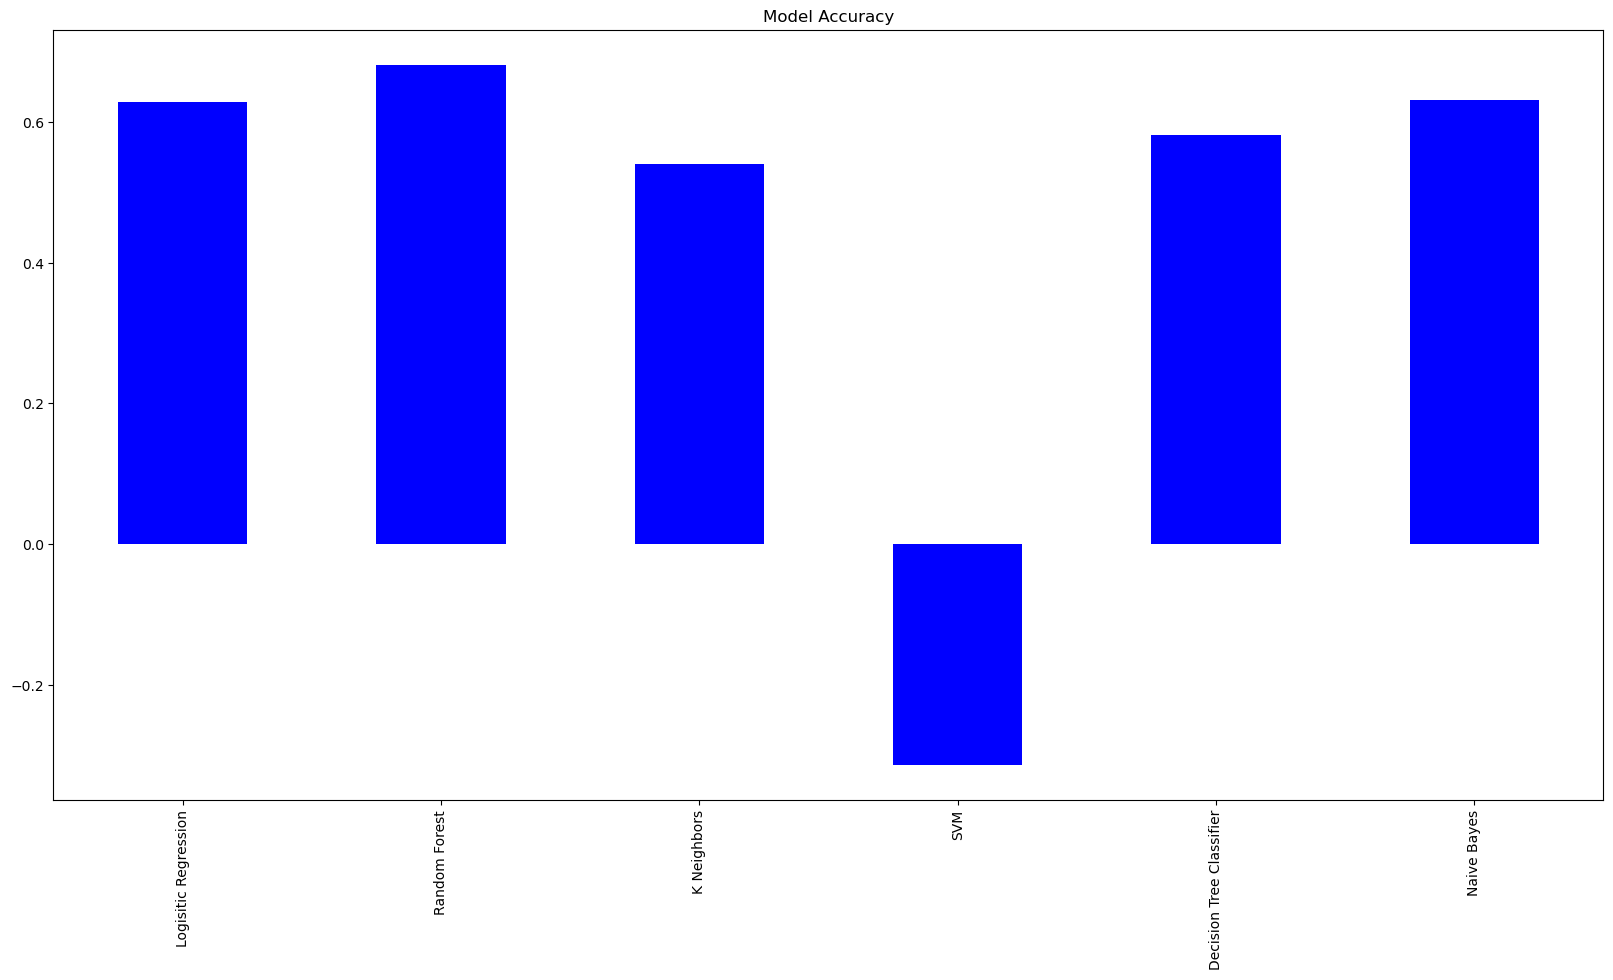

In [28]:
#display model accuracy in chart
model_scores = pd.DataFrame(scaled_scores, index=[0])
model_scores.T.plot.bar(title="Model Accuracy", color='blue', legend=False);

plt.savefig("model_accuracy.png")

In [29]:
#metrics evaluation for the model with highest accuracy
from sklearn.metrics import classification_report

forest_model = RandomForestClassifier()
forest_model.fit(x_train,y_train)
y_predforestscaled = forest_model.predict(x_test)
print(classification_report(y_test, y_predforestscaled))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       412
           1       0.58      0.31      0.41       244

    accuracy                           0.66       656
   macro avg       0.63      0.59      0.58       656
weighted avg       0.64      0.66      0.63       656



In [30]:
#metrics evalutaion for he model with next highest accuracy
g_NB = GaussianNB()
g_NB.fit(x_train, y_train)
y_predNB = g_NB.predict(x_test)
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       412
           1       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656



Note: from the classification report, we can notice that. The model works well for the unsafe class (class 0) because the majority of the samples belongs to this class.

In [31]:
#Hyperparameter tuning using gridsearch cv
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
lrparam_grid = {'C': c_space}

# Instantiating logistic regression classifier
log_reg = LogisticRegression()
 
# Instantiating the GridSearchCV object
lr_gscv = GridSearchCV(log_reg, lrparam_grid, cv = 5)
 
lr_gscv.fit(x_train, y_train)

lr_gscv.best_score_


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Lenovo\anaconda3\Lib\site-packa

0.6053435114503818

In [32]:

# check best parameters
lr_gscv.best_params_

{'C': 1e-05}

In [33]:

from sklearn.model_selection import RandomizedSearchCV

lr_rscv = RandomizedSearchCV(log_reg, lrparam_grid, cv = 5, n_iter = 20, verbose = True)

lr_rscv.fit(x_train, y_train)

lr_rscv.best_score_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning:

The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Lenovo\anaconda3\Lib\site-packa

0.6053435114503818

In [34]:

lr_rscv.best_params_

{'C': 1e-05}

In [35]:
# Creating the hyperparameter grid
rfparam_grid = {'n_estimators': np.arange(10, 1000, 50),
              'max_depth': [None, 3, 5, 10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2),
              }
 
# Instantiating Random Forest classifier
forest = RandomForestClassifier()
 
# Instantiating RandomizedSearchCV object
rf_rscv = RandomizedSearchCV(forest, rfparam_grid, cv = 5, n_iter = 30, verbose = True)
 
rf_rscv.fit(x_train, y_train)
 
# Print the tuned parameters and score
rf_rscv.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_estimators': 560,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [36]:
rf_rscv.best_score_

0.6740458015267176

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# metrics evaluation on tuned model with best score
y_predrf = rf_rscv.predict(x_test)
report = classification_report(y_test, y_predrf)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.67      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



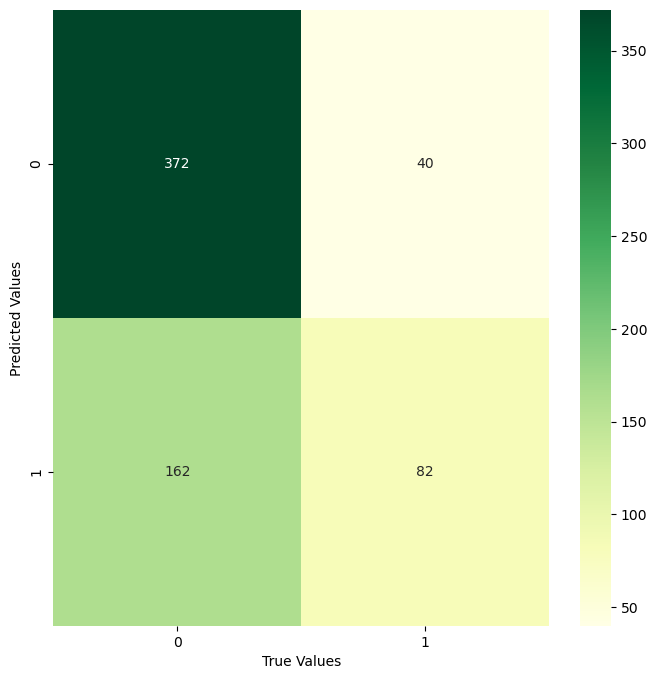

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap((confusion_matrix(y_test,y_predrf)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [43]:
#crossvalidation:to assure that our model got the correct patterns from the data, and it is not getting up too much noise
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from pandas import DataFrame

In [44]:
rnd_model = RandomForestClassifier(n_estimators = 710, min_samples_split = 10, min_samples_leaf = 1, max_depth = None)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
score_acc = cross_val_score(rnd_model, x, y, scoring='accuracy', cv=cv)
print('Accuracy is: ', mean(score_acc))

Accuracy is:  0.6731769473658038


In [45]:
score_precision = cross_val_score(rnd_model, x, y, scoring='precision', cv=cv)
print('Precision is: ', mean(score_precision))

Precision is:  0.6691481153255856


In [46]:
score_recall = cross_val_score(rnd_model, x, y, scoring='recall', cv=cv)
print('Recall is: ', mean(score_recall))

Recall is:  0.33591289370078736


In [ ]:
score_f1 = cross_val_score(rnd_model, x, y, scoring='f1', cv=cv)
print('F1 is: ', mean(score_f1))

In [ ]:
# to visualize the scores

cross_valdf = pd.DataFrame({'Accuracy': mean(score_acc),
                            'Precision': mean(score_precision),
                            'Recall': mean(score_recall),
                            'F1': mean(score_f1)}, index = [0])

cross_valdf.T.plot.bar(title ='Scores for Cross Validated Random Forest Classifier', color = 'purple', legend = False);                          

Final Remarks
finally, from my analysis to this dataset I can conclude

The data is almost clean and there was few incorrect report the dropped them.
I cannot find a clear evidence that some features are redundant of can produce a biased solution.
There is a class imbalance problem which affect the classifiers' performance.
Using sample weights produces more accurate classifier. However, deep investigation is required.